In [4]:
import pandas as pd
from sqlalchemy import create_engine
import os
import urllib.parse
import seaborn as sns

In [33]:
amazon_df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
display(amazon_df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [34]:
# part 1 :
pd.set_option('display.float_format', lambda x: '%.2f' % x)
crosstab_result = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller']).sort_values(by=True, ascending=False).head(10)

crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [35]:
# 2 :
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_p_value
# 0 < 0,05 - reject the null hypothesis - independant, so we accept dependant

0.0

In [36]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")
#low association

0.16999680408904638

<Axes: xlabel='category'>

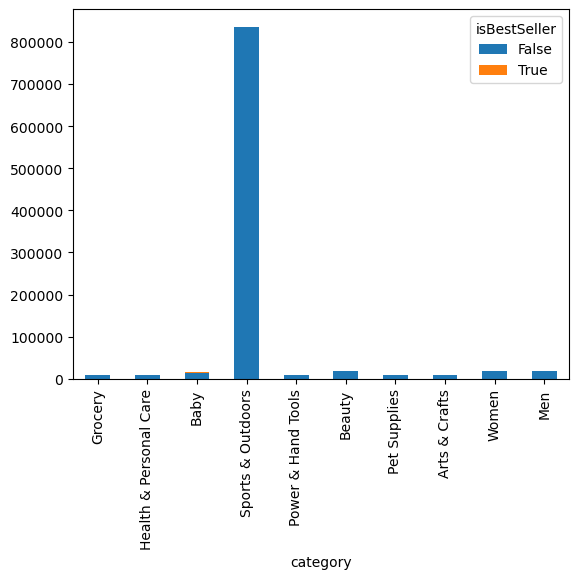

In [37]:
# 3:
crosstab_result.plot(kind="bar", stacked=True)

In [38]:
# part 2 : 0 : 
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [39]:
remove = tukeys_test_outliers(amazon_df['price'])
remove

10        139.00
19        164.99
25        149.99
28        289.00
31        199.99
           ...  
2443619   166.99
2443627   152.58
2443638   108.77
2443641   166.99
2443643   158.99
Name: price, Length: 327688, dtype: float64

In [40]:
amazon2_df = amazon_df[~amazon_df['price'].isin(remove)]
round(amazon2_df['price'].describe(),2)

count   2115963.00
mean         23.41
std          20.51
min           0.00
25%           9.13
50%          15.99
75%          29.99
max          99.99
Name: price, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_18224\2423387067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_cat_df , x='price', y='category', palette="coolwarm")


<Axes: xlabel='price', ylabel='category'>

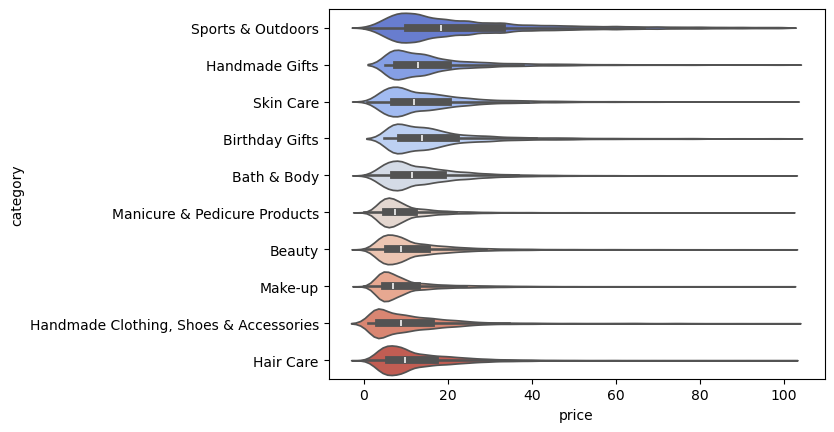

In [63]:
#1 :
filter = amazon2_df['category'].value_counts().head(10).index
top_cat_df = amazon2_df[amazon2_df['category'].isin(filter)]
sns.violinplot(data=top_cat_df , x='price', y='category', palette="coolwarm")

In [58]:
median_prices = amazon_df.groupby('category')['price'].median()
max_median_price_category = median_prices.idxmax()
max_median_price_value = median_prices.max()
print(f"category is '{max_median_price_category}' with {max_median_price_value:.2f}.")

category is 'Laptops' with 1042.72.


C:\Users\User\AppData\Local\Temp\ipykernel_18224\2165513116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cat_df, x='price', y='category', palette="rocket")


<Axes: xlabel='price', ylabel='category'>

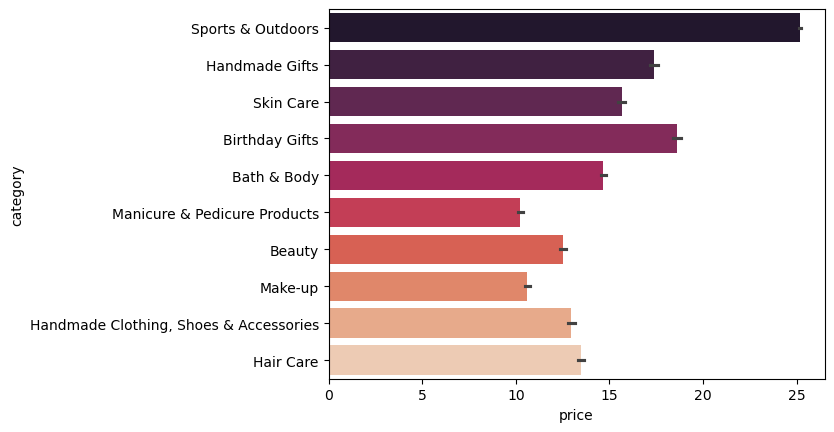

In [62]:
#2 : 
filter = amazon2_df['category'].value_counts().head(10).index
top_cat_df = amazon2_df[amazon2_df['category'].isin(filter)]
sns.barplot(data=top_cat_df, x='price', y='category', palette="rocket")

In [57]:
mean_prices = amazon_df.groupby('category')['price'].mean()
max_mean_price_category = mean_prices.idxmax()
max_mean_price_value = mean_prices.max()
print(f"category is '{max_mean_price_category}' with {max_mean_price_value:.2f}.")

category is 'Laptops' with 1087.99.


C:\Users\User\AppData\Local\Temp\ipykernel_18224\1727173725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_cat_df, x='stars', y='category', palette="crest")


<Axes: xlabel='stars', ylabel='category'>

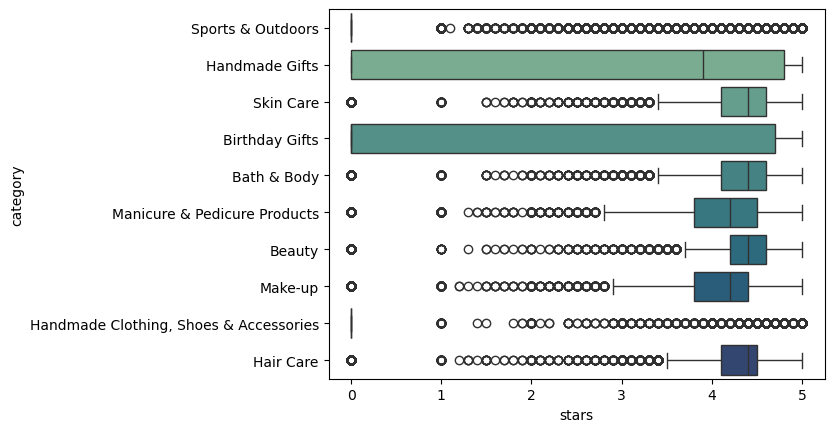

In [61]:
#3 :
filter = amazon2_df['category'].value_counts().head(10).index
top_cat_df = amazon2_df[amazon2_df['category'].isin(filter)]
sns.boxplot(data=top_cat_df, x='stars', y='category', palette="crest")


In [60]:
median_prices = amazon_df.groupby('category')['stars'].median()
max_median_price_category = median_prices.idxmax()
max_median_price_value = median_prices.max()
print(f"category is '{max_median_price_category}' with {max_median_price_value:.2f}.")

category is 'Computer Memory' with 4.70.


In [69]:
# part 3 : 
correlation1 = amazon2_df['price'].corr(amazon2_df['stars'])

correlation = amazon2_df['price'].corr(amazon2_df['stars'], method='spearman')
correlation, correlation1
# No : little or not linear correlation

(-0.06679697280768314, -0.0776729987818137)

<Axes: xlabel='price', ylabel='stars'>

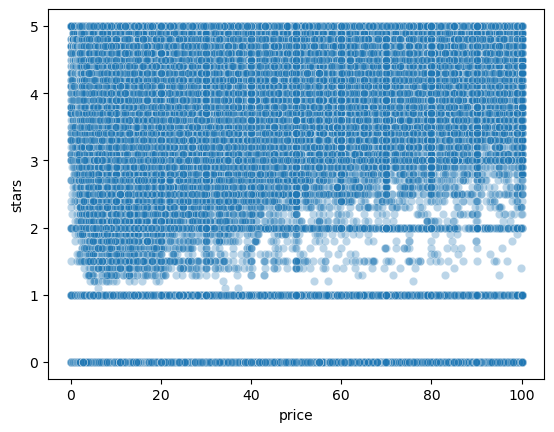

In [71]:
sns.scatterplot(data=amazon2_df, x='price', y='stars', alpha=0.3)

# ratings are on average higher for products with a higher price means quality of the product depend of his price

In [77]:
df_numerical = amazon2_df[['stars','price','reviews','boughtInLastMonth']]
display(df_numerical)

,stars,price,reviews,boughtInLastMonth
0,4.70,21.99,15308,0
1,4.70,23.99,98099,0
2,4.70,21.99,15308,0
3,4.70,31.99,7205,0
4,4.60,17.99,1881,0
...,...,...,...,...
2443646,0.00,22.34,0,0
2443647,0.00,97.99,0,0
2443648,0.00,52.99,0,0
2443649,4.30,79.99,404,0


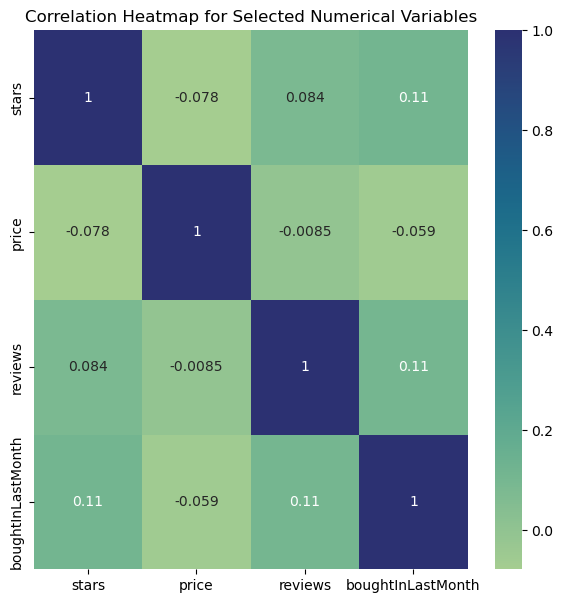

In [83]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(7, 7))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="crest")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

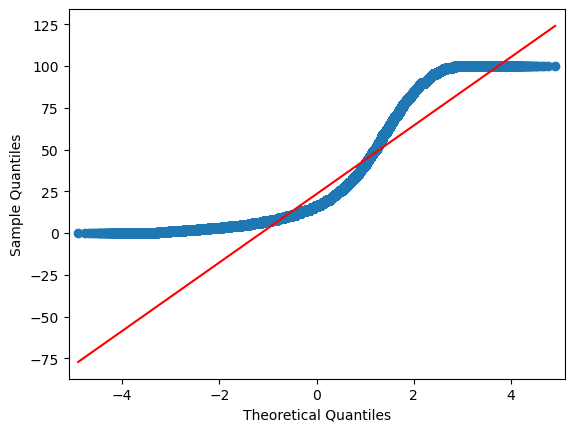

In [88]:
import statsmodels.api as sm

sm.qqplot(amazon2_df['price'], line='s');
# Deviations of the data points from the red line, indicate deviations from normality.